In [28]:
from keras.utils import to_categorical
!pip install keras_preprocessing
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [6]:
print(train)

                                image    label
0         images/train/happy/3578.jpg    happy
1        images/train/happy/16988.jpg    happy
2         images/train/happy/2666.jpg    happy
3         images/train/happy/5109.jpg    happy
4        images/train/happy/11981.jpg    happy
...                               ...      ...
28816  images/train/disgust/10112.jpg  disgust
28817  images/train/disgust/21668.jpg  disgust
28818   images/train/disgust/7049.jpg  disgust
28819   images/train/disgust/9716.jpg  disgust
28820   images/train/disgust/3561.jpg  disgust

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [8]:
print(test)
print(test['image'])

                              image    label
0       images/test/happy/23933.jpg    happy
1       images/test/happy/24906.jpg    happy
2       images/test/happy/18033.jpg    happy
3       images/test/happy/15271.jpg    happy
4       images/test/happy/26888.jpg    happy
...                             ...      ...
7061  images/test/disgust/20761.jpg  disgust
7062  images/test/disgust/28710.jpg  disgust
7063  images/test/disgust/23876.jpg  disgust
7064   images/test/disgust/9460.jpg  disgust
7065  images/test/disgust/35580.jpg  disgust

[7066 rows x 2 columns]
0         images/test/happy/23933.jpg
1         images/test/happy/24906.jpg
2         images/test/happy/18033.jpg
3         images/test/happy/15271.jpg
4         images/test/happy/26888.jpg
                    ...              
7061    images/test/disgust/20761.jpg
7062    images/test/disgust/28710.jpg
7063    images/test/disgust/23876.jpg
7064     images/test/disgust/9460.jpg
7065    images/test/disgust/35580.jpg
Name: image, Leng

In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [11]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

/Users/sarthakdubey/anaconda3/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [20]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 [==============================] - 161s 710ms/step - loss: 1.8268 - accuracy: 0.2429 - val_loss: 1.8040 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 186s 822ms/step - loss: 1.7862 - accuracy: 0.2562 - val_loss: 1.6914 - val_accuracy: 0.3128
Epoch 3/100
226/226 [==============================] - 188s 830ms/step - loss: 1.6611 - accuracy: 0.3324 - val_loss: 1.5381 - val_accuracy: 0.4113
Epoch 4/100
226/226 [==============================] - 203s 897ms/step - loss: 1.5387 - accuracy: 0.4019 - val_loss: 1.4170 - val_accuracy: 0.4465
Epoch 5/100
226/226 [==============================] - 196s 869ms/step - loss: 1.4643 - accuracy: 0.4314 - val_loss: 1.3235 - val_accuracy: 0.4929
Epoch 6/100
226/226 [==============================] - 202s 896ms/step - loss: 1.4086 - accuracy: 0.4568 - val_loss: 1.3043 - val_accuracy: 0.4983
Epoch 7/100
226/226 [==============================] - 201s 888ms/step - loss: 1.3637 - accuracy: 0.4750 - val_loss: 1

226/226 [==============================] - 179s 793ms/step - loss: 0.9211 - accuracy: 0.6574 - val_loss: 1.0328 - val_accuracy: 0.6227
Epoch 57/100
226/226 [==============================] - 179s 793ms/step - loss: 0.9135 - accuracy: 0.6560 - val_loss: 1.0270 - val_accuracy: 0.6274
Epoch 58/100
226/226 [==============================] - 179s 793ms/step - loss: 0.9094 - accuracy: 0.6600 - val_loss: 1.0439 - val_accuracy: 0.6228
Epoch 59/100
226/226 [==============================] - 178s 787ms/step - loss: 0.9065 - accuracy: 0.6633 - val_loss: 1.0383 - val_accuracy: 0.6226
Epoch 60/100
226/226 [==============================] - 177s 785ms/step - loss: 0.8989 - accuracy: 0.6630 - val_loss: 1.0569 - val_accuracy: 0.6166
Epoch 61/100
226/226 [==============================] - 177s 785ms/step - loss: 0.8949 - accuracy: 0.6643 - val_loss: 1.0375 - val_accuracy: 0.6203
Epoch 62/100
226/226 [==============================] - 180s 795ms/step - loss: 0.8913 - accuracy: 0.6663 - val_loss: 1.0275 

In [22]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [23]:
from keras.models import model_from_json

In [24]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")


FileNotFoundError: [Errno 2] No such file or directory: 'facialemotionmodel.json'

In [25]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [29]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 23ms/step


NameError: name 'label' is not defined

In [30]:
# Assuming you have a list of class labels for your model
class_labels = ['label_0', 'label_1', 'label_2', ...]

# Convert the class labels to a numpy array for indexing
label = np.array(class_labels)


In [31]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 32ms/step


IndexError: index 5 is out of bounds for axis 0 with size 4

In [33]:
import numpy as np

# Assuming you have a list of class labels for your model
class_labels = ['label_0', 'label_1', 'label_2', 'label_3']

# Convert the class labels to a numpy array for indexing
label = np.array(class_labels)

# Assuming 'pred' is the output from your model prediction
predicted_index = pred.argmax()

# Check if the index is within the valid range
if 0 <= predicted_index < len(label):
    pred_label = label[predicted_index]
    print("Model prediction is", pred_label)
else:
    print("Invalid index:", predicted_index)


Invalid index: 5


In [34]:
from keras.models import model_from_json

In [36]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [37]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [38]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [39]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 119ms/step
model prediction is  sad


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 24ms/step
model prediction is  sad


/Users/sarthakdubey/anaconda3/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


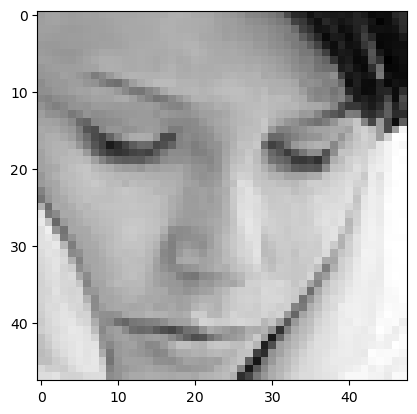

In [41]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 26ms/step
model prediction is  sad


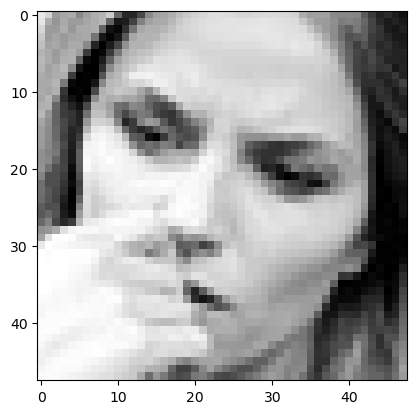

In [42]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Number of layers in the model: 19


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Example model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Get the layers in the model
layers = model.layers

# Print layer names
for layer in layers:
    print(layer.name)


conv2d_4
max_pooling2d_4
flatten_1
dense_3
dense_4


In [45]:
from keras.models import Sequential
from keras.layers import Dense

# Example model
model = Sequential()
model.add(Dense(64, input_shape=(100,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                6464      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 7114 (27.79 KB)
Trainable params: 7114 (27.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
